In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(28):
    s = ''
    for j in range(28):
        s = s + str("{0:3d}").format(x_train[0,i,j]) + ''
    print(s)
        
print(y_train[0])

Using TensorFlow backend.


  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

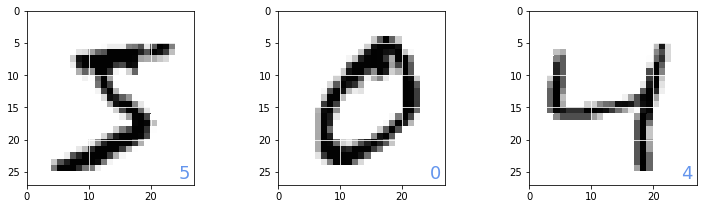

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

In [3]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train/255
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)

print(y_train[0:3,:])

(60000, 784)
(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [4]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [5]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 5us/step - loss: 2.0612 - accuracy: 0.2890 - val_loss: 1.7858 - val_accuracy: 0.5007
Epoch 2/10
60000/60000 [==============================] - 0s 4us/step - loss: 1.6053 - accuracy: 0.6520 - val_loss: 1.4366 - val_accuracy: 0.7673
Epoch 3/10
60000/60000 [==============================] - 0s 4us/step - loss: 1.3184 - accuracy: 0.7885 - val_loss: 1.1971 - val_accuracy: 0.8203
Epoch 4/10
60000/60000 [==============================] - 0s 4us/step - loss: 1.1119 - accuracy: 0.8249 - val_loss: 1.0178 - val_accuracy: 0.8446
Epoch 5/10
60000/60000 [==============================] - 0s 4us/step - loss: 0.9532 - accuracy: 0.8438 - val_loss: 0.8783 - val_accuracy: 0.8590
Epoch 6/10
60000/60000 [==============================] - 0s 4us/step - loss: 0.8298 - accuracy: 0.8590 - val_loss: 0.7708 - val_accuracy: 0.8712
Epoch 7/10
60000/60000 [==============================] - 0s 3us/step - lo

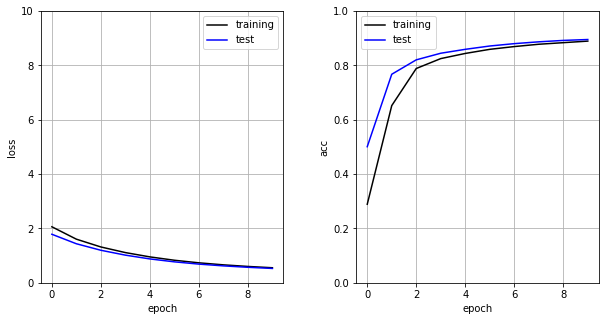

In [6]:
plt.figure(1, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='blue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='blue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

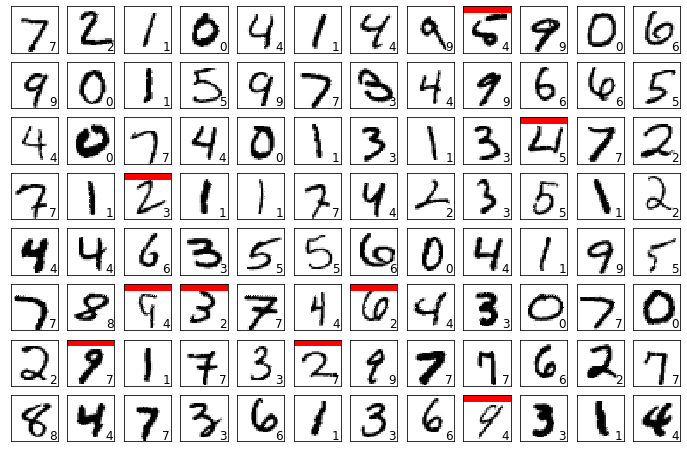

In [7]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize = 12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='red', linewidth=10)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
        
show_prediction()
plt.show()

In [8]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [9]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s 4us/step - loss: 1.5028 - accuracy: 0.5601 - val_loss: 0.8011 - val_accuracy: 0.8297
Epoch 2/10
60000/60000 [==============================] - 0s 3us/step - loss: 0.6119 - accuracy: 0.8564 - val_loss: 0.4672 - val_accuracy: 0.8845
Epoch 3/10
60000/60000 [==============================] - 0s 3us/step - loss: 0.4305 - accuracy: 0.8879 - val_loss: 0.3758 - val_accuracy: 0.9028
Epoch 4/10
60000/60000 [==============================] - 0s 4us/step - loss: 0.3643 - accuracy: 0.9006 - val_loss: 0.3330 - val_accuracy: 0.9103
Epoch 5/10
60000/60000 [==============================] - 0s 4us/step - loss: 0.3292 - accuracy: 0.9082 - val_loss: 0.3069 - val_accuracy: 0.9157
Epoch 6/10
60000/60000 [==============================] - 0s 4us/step - loss: 0.3061 - accuracy: 0.9142 - val_loss: 0.2903 - val_accuracy: 0.9188
Epoch 7/10
60000/60000 [==============================] - 0s 4us/step - lo

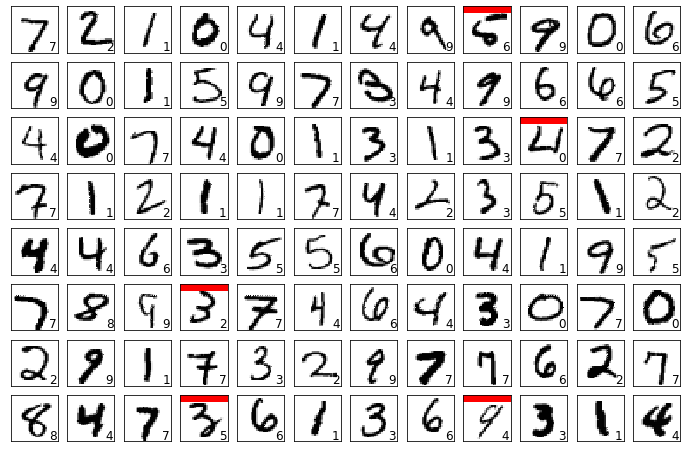

In [10]:
show_prediction()
plt.show()

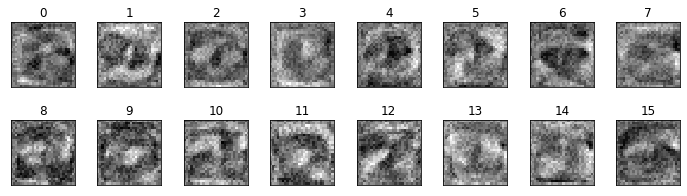

In [11]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [34]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

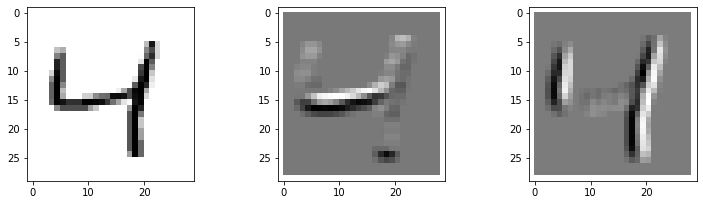

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1], [1,1,1], [-2,-2,-2]], dtype=float)
myfil2 = np.array([[-2,1,1], [-2,1,1], [-2,1,1]], dtype=float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))
    
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1-x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [35]:
##14주차 시작
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.8104 - accuracy: 0.8045 - val_loss: 0.3353 - val_accuracy: 0.9058
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3069 - accuracy: 0.9130 - val_loss: 0.2644 - val_accuracy: 0.9264
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2507 - accuracy: 0.9300 - val_loss: 0.2228 - val_accuracy: 0.9374
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2133 - accuracy: 0.9412 - val_loss: 0.1961 - val_accuracy: 0.9472
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1829 - accuracy: 0.9497 - val_loss: 0.1736 - val_accuracy: 0.9527
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.1593 - accuracy: 0.9567 - val_loss: 0.1498 - val_accuracy: 0.9599
Epoch 7/20
60000/60000 [==============================] - 2s 40us/st

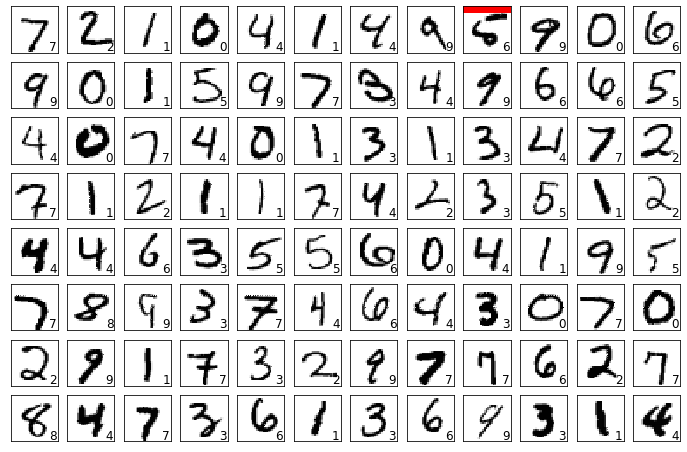

In [37]:
import matplotlib.pyplot as plt
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='red', linewidth=10)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

show_prediction()
plt.show()

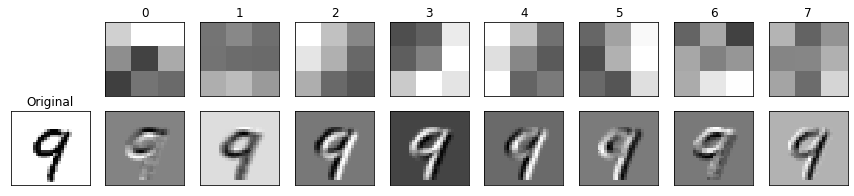

In [26]:
plt.figure(1, figsize=(15, 3))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
            np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")

plt.show()

In [29]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size = 1000, epochs=20, verbose=1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy', score[1])
print("Computation time={0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 305us/step - loss: 0.7236 - accuracy: 0.7751 - val_loss: 0.1418 - val_accuracy: 0.9573
Epoch 2/20
60000/60000 [==============================] - 18s 298us/step - loss: 0.1462 - accuracy: 0.9560 - val_loss: 0.0650 - val_accuracy: 0.9797
Epoch 3/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.0928 - accuracy: 0.9723 - val_loss: 0.0463 - val_accuracy: 0.9854
Epoch 4/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.0748 - accuracy: 0.9765 - val_loss: 0.0378 - val_accuracy: 0.9872
Epoch 5/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.0595 - accuracy: 0.9813 - val_loss: 0.0321 - val_accuracy: 0.9892
Epoch 6/20
60000/60000 [==============================] - 18s 294us/step - loss: 0.0530 - accuracy: 0.9829 - val_loss: 0.0309 - val_accuracy: 0.9896
Epoch 7/20
60000/60000 [==============================] 

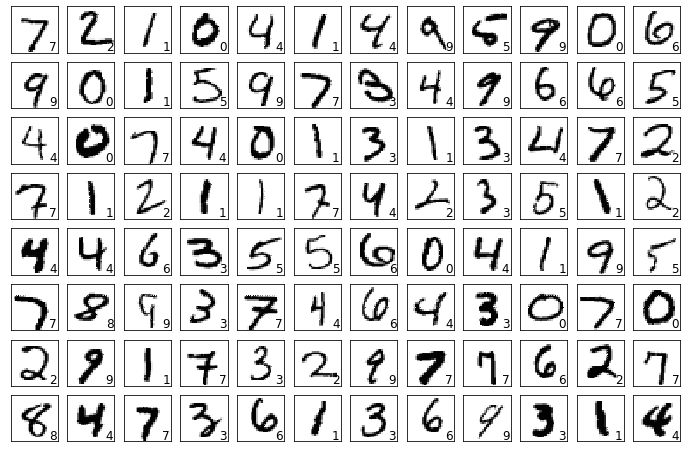

In [30]:
show_prediction()
plt.show()

In [31]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
